## Data Examination

In [1]:
import pandas as pd

# Load the dataset into a Pandas DataFrame
df = pd.read_csv("data.csv")

# Display the first few rows of the DataFrame
df.head()

,title,price_in_aed,kilometers,body_condition,mechanical_condition,seller_type,body_type,no_of_cylinders,transmission_type,regional_specs,horsepower,fuel_type,steering_side,year,color,emirate,motors_trim,company,model,date_posted
0,MITSUBISHI PAJERO 3.5L / 2013,"26,000",167390,Perfect inside and out,Perfect inside and out,Dealer,SUV,6,Automatic Transmission,GCC Specs,Unknown,Gasoline,Left Hand Side,2013.0,Silver,Dubai,GLS,mitsubishi,pajero,13/05/2022
1,chevrolet silverado,"110,000",39000,Perfect inside and out,Perfect inside and out,Dealer,SUV,8,Automatic Transmission,North American Specs,400 - 500 HP,Gasoline,Left Hand Side,2018.0,White,Sharjah,1500 High Country,chevrolet,silverado,14/01/2022
2,MERCEDES-BENZ E300 - 2014 - GCC SPEC - FULL OP...,"78,000",200000,Perfect inside and out,Perfect inside and out,Dealer,Sedan,6,Automatic Transmission,GCC Specs,400 - 500 HP,Gasoline,Left Hand Side,2014.0,Blue,Sharjah,E 300,mercedes-benz,e-class,05/05/2022
3,WARRANTY UNTIL APR 2023 || Ferrari 488 Spider ...,"899,000",27000,Perfect inside and out,Perfect inside and out,Dealer,Hard Top Convertible,8,Automatic Transmission,GCC Specs,600 - 700 HP,Gasoline,Left Hand Side,2018.0,Red,Dubai,Standard,ferrari,488-spider,30/04/2022
4,USED RENAULT DOKKER 2020,"33,000",69000,Perfect inside and out,Perfect inside and out,Owner,Wagon,4,Manual Transmission,GCC Specs,Less than 150 HP,Gasoline,Left Hand Side,2020.0,White,Dubai,Standard,renault,dokker,13/05/2022


In [2]:
# Get the shape of the DataFrame
shape_df = df.shape
print("Rows:", shape_df[0])
print("Columns:", shape_df[1])

Rows: 9970
Columns: 20


In [3]:
# Drop unneeded columns 
df.drop(['title','date_posted','motors_trim'], axis = 1, inplace=True)

In [4]:
# Check for missing data
missing_data = df.isnull().sum()

# Display columns with missing data
print("Missing Data:")
print(missing_data)

Missing Data:
price_in_aed              0
kilometers                0
body_condition            0
mechanical_condition      0
seller_type               0
body_type                 0
no_of_cylinders          59
transmission_type         0
regional_specs            0
horsepower                0
fuel_type                 0
steering_side             0
year                    970
color                     0
emirate                   0
company                   0
model                     0
dtype: int64


## Data Preparation

In [5]:
# Drop rows with missing values
df.dropna(inplace=True)

In [6]:
# Get the new shape of the DataFrame
shape_df = df.shape
print("Rows:", shape_df[0])
print("Columns:", shape_df[1])

Rows: 8969
Columns: 17


In [7]:
# Check the features and data types 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8969 entries, 0 to 9969
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   price_in_aed          8969 non-null   object 
 1   kilometers            8969 non-null   int64  
 2   body_condition        8969 non-null   object 
 3   mechanical_condition  8969 non-null   object 
 4   seller_type           8969 non-null   object 
 5   body_type             8969 non-null   object 
 6   no_of_cylinders       8969 non-null   object 
 7   transmission_type     8969 non-null   object 
 8   regional_specs        8969 non-null   object 
 9   horsepower            8969 non-null   object 
 10  fuel_type             8969 non-null   object 
 11  steering_side         8969 non-null   object 
 12  year                  8969 non-null   float64
 13  color                 8969 non-null   object 
 14  emirate               8969 non-null   object 
 15  company              

In [8]:
# Remove ',' 
df['price_in_aed'] = df['price_in_aed'].str.replace(',','')

In [9]:
# Convert Price to Numeric Format
convert_columns = ['price_in_aed', 'kilometers','no_of_cylinders', 'year']
df[convert_columns] = df[convert_columns].apply(pd.to_numeric, errors='coerce').fillna(0).astype(int)

In [10]:
# Remove leading spaces in emirate
df['emirate'] = df['emirate'].str.lstrip()

In [11]:
# Check the features and data types 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8969 entries, 0 to 9969
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   price_in_aed          8969 non-null   int32 
 1   kilometers            8969 non-null   int32 
 2   body_condition        8969 non-null   object
 3   mechanical_condition  8969 non-null   object
 4   seller_type           8969 non-null   object
 5   body_type             8969 non-null   object
 6   no_of_cylinders       8969 non-null   int32 
 7   transmission_type     8969 non-null   object
 8   regional_specs        8969 non-null   object
 9   horsepower            8969 non-null   object
 10  fuel_type             8969 non-null   object
 11  steering_side         8969 non-null   object
 12  year                  8969 non-null   int32 
 13  color                 8969 non-null   object
 14  emirate               8969 non-null   object
 15  company               8969 non-null   

## EDA

In [12]:
# Obtain descriptive statistics for numerical variables
stats_df = df.describe().transpose()
print(stats_df)

                  count           mean           std     min      25%  \
price_in_aed     8969.0  195440.130895  3.873017e+05  6000.0  48000.0   
kilometers       8969.0  109834.757275  1.216529e+06     0.0  38000.0   
no_of_cylinders  8969.0       6.103802  1.980907e+00     0.0      4.0   
year             8969.0    2015.609655  4.735233e+00  1953.0   2014.0   

                     50%       75%          max  
price_in_aed     90000.0  183000.0   14999000.0  
kilometers       88000.0  140000.0  115000000.0  
no_of_cylinders      6.0       8.0         12.0  
year              2016.0    2019.0       2021.0  


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

Count of steering side:
Left Hand Side     8964
Right Hand Side       5
Name: steering_side, dtype: int64


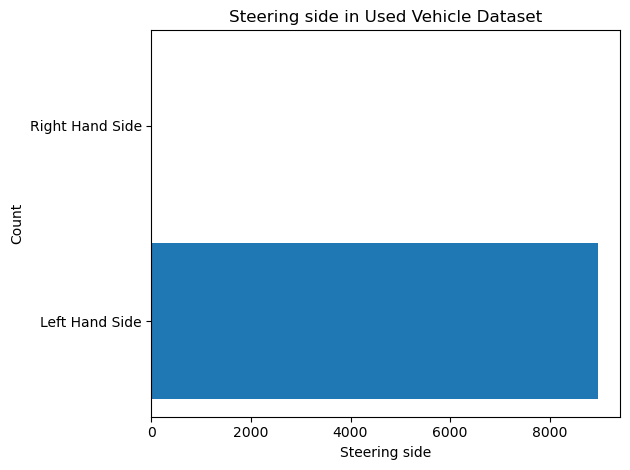

In [14]:
# Count the occurrences of each unique steering_side
columns_counts = df['steering_side'].value_counts()
print("Count of steering side:")
print(columns_counts)

# Create a horizontal bar chart
plt.barh(columns_counts .index, columns_counts.values)
plt.xlabel("Steering side")
plt.ylabel("Count")
plt.title("Steering side in Used Vehicle Dataset") 
plt.tight_layout()
plt.show()

Count of horsepower:
200 - 300 HP        2293
300 - 400 HP        2054
150 - 200 HP        1137
400 - 500 HP        1105
500 - 600 HP         826
Unknown              746
Less than 150 HP     365
600 - 700 HP         287
700 - 800 HP         114
800 - 900 HP          25
900+ HP               17
Name: horsepower, dtype: int64


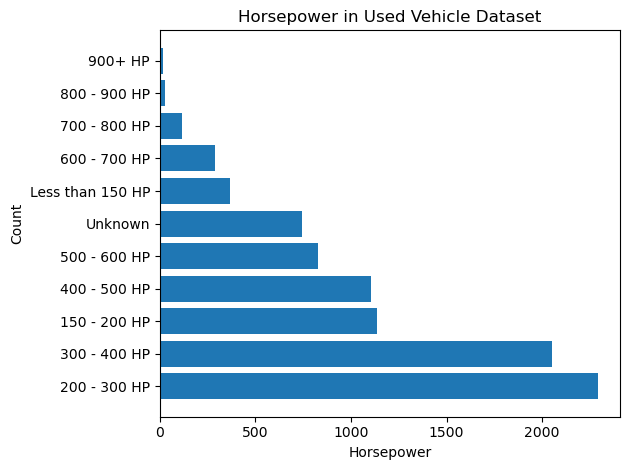

In [15]:
# Count the occurrences of each unique horsepower
columns_counts = df['horsepower'].value_counts()
print("Count of horsepower:")
print(columns_counts)

# Create a horizontal bar chart
plt.barh(columns_counts .index, columns_counts.values)
plt.xlabel("Horsepower")
plt.ylabel("Count")
plt.title("Horsepower in Used Vehicle Dataset") 
plt.tight_layout()
plt.show()

Count of Emirate:
Dubai             7087
Sharjah            963
Abu Dhabi          704
Ajman              145
Al Ain              36
Ras Al Khaimah      20
Umm Al Qawain        7
Fujeirah             7
Name: emirate, dtype: int64


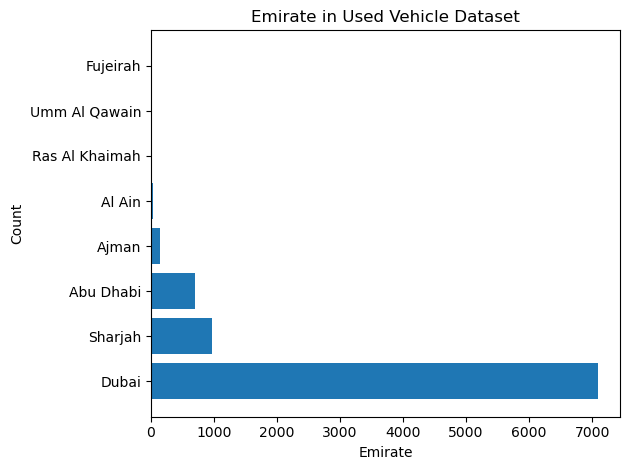

In [16]:
# Count the occurrences of each unique emirate
columns_counts = df['emirate'].value_counts()
print("Count of Emirate:")
print(columns_counts)

# Create a horizontal bar chart
plt.barh(columns_counts .index, columns_counts.values)
plt.xlabel("Emirate")
plt.ylabel("Count")
plt.title("Emirate in Used Vehicle Dataset") 
plt.tight_layout()
plt.show()

Count of regional_specs:
GCC Specs               6940
North American Specs    1138
Other                    370
European Specs           272
Japanese Specs           249
Name: regional_specs, dtype: int64


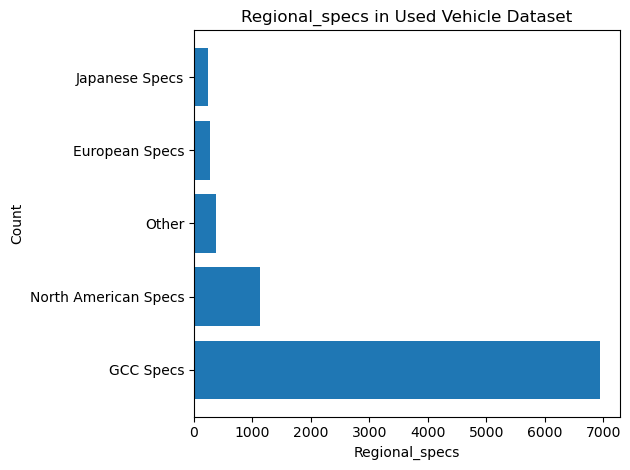

In [17]:
# Count the occurrences of each unique regional_specs
columns_counts  = df['regional_specs'].value_counts()
print("Count of regional_specs:")
print(columns_counts )

# Create a horizontal bar chart
plt.barh(columns_counts.index, columns_counts.values)
plt.xlabel("Regional_specs")
plt.ylabel("Count")
plt.title("Regional_specs in Used Vehicle Dataset") 
plt.tight_layout()
plt.show()

Count of Body Type:
SUV                     3964
Sedan                   2601
Coupe                    794
Pick Up Truck            353
Hatchback                325
Sports Car               239
Van                      152
Hard Top Convertible     147
Soft Top Convertible     131
Other                     95
Crossover                 91
Wagon                     54
Utility Truck             23
Name: body_type, dtype: int64


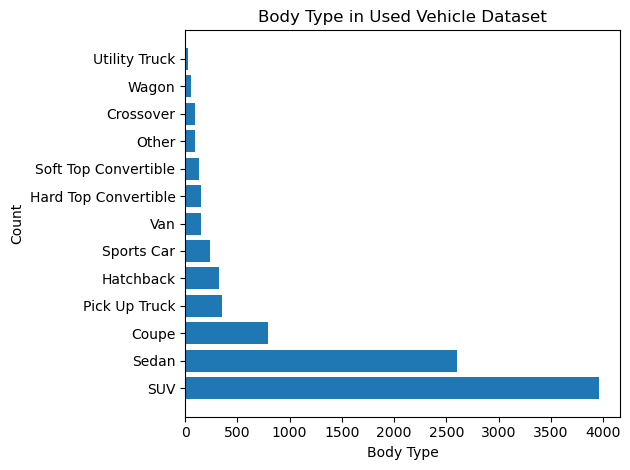

In [18]:
# Count the occurrences of each unique Body Type
columns_counts = df['body_type'].value_counts()
print("Count of Body Type:")
print(columns_counts)

# Create a horizontal bar chart
plt.barh(columns_counts.index, columns_counts.values)
plt.xlabel("Body Type")
plt.ylabel("Count")
plt.title("Body Type in Used Vehicle Dataset") 
plt.tight_layout()
plt.show()

Count of Body Condition:
Perfect inside and out                8611
No accidents, very few faults          208
A bit of wear & tear, all repaired     119
Normal wear & tear, a few issues        31
Name: body_condition, dtype: int64


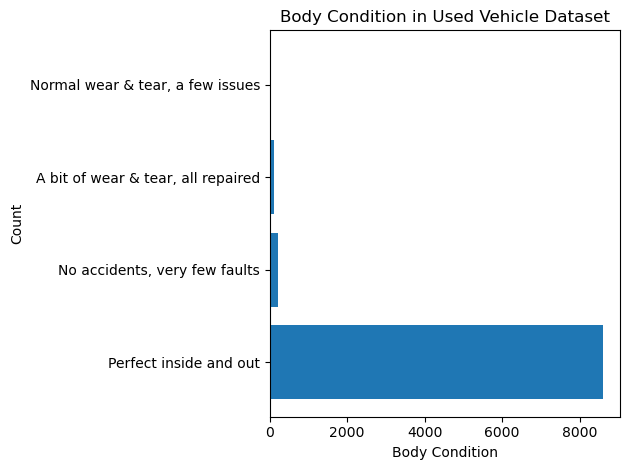

In [19]:
# Count the occurrences of each unique Body Condition
columns_counts  = df['body_condition'].value_counts()
print("Count of Body Condition:")
print(columns_counts )

# Create a horizontal bar chart
plt.barh(columns_counts.index, columns_counts.values)
plt.xlabel("Body Condition")
plt.ylabel("Count")
plt.title("Body Condition in Used Vehicle Dataset") 
plt.tight_layout()
plt.show()

Count of Mechanical Condition:
Perfect inside and out              8822
Minor faults, all fixed              135
Major faults fixed, small remain       8
Ongoing minor & major faults           3
Major faults, all fixed                1
Name: mechanical_condition, dtype: int64


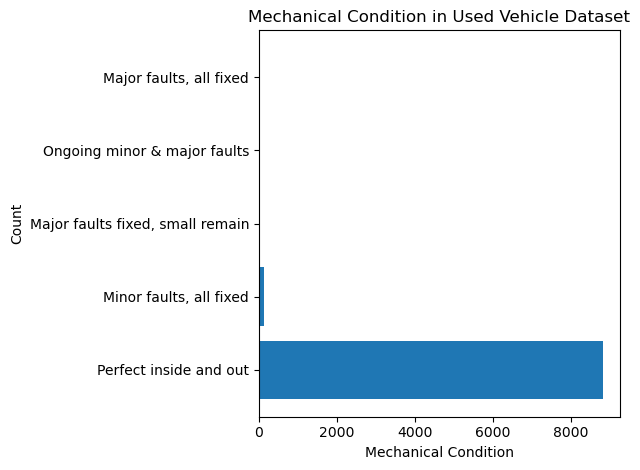

In [20]:
# Count the occurrences of each unique Mechanical Condition
columns_counts = df['mechanical_condition'].value_counts()
print("Count of Mechanical Condition:")
print(columns_counts)

# Create a horizontal bar chart
plt.barh(columns_counts.index, columns_counts.values)
plt.xlabel("Mechanical Condition")
plt.ylabel("Count")
plt.title("Mechanical Condition in Used Vehicle Dataset") 
plt.tight_layout()
plt.show()

Count of Transmission Type:
Automatic Transmission    8626
Manual Transmission        343
Name: transmission_type, dtype: int64


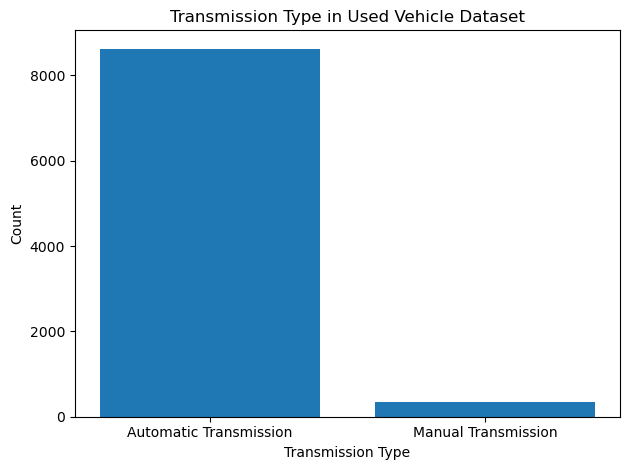

In [21]:
# Count the occurrences of each unique 'Transmission Type'
columns_counts = df['transmission_type'].value_counts()
print("Count of Transmission Type:")
print(columns_counts)

# Create a bar chart
plt.bar(columns_counts.index, columns_counts.values)
plt.xlabel("Transmission Type")
plt.ylabel("Count")
plt.title("Transmission Type in Used Vehicle Dataset")
plt.tight_layout()
plt.show()

Count of Fuel Type:
Gasoline    8826
Diesel       101
Electric      25
Hybrid        17
Name: fuel_type, dtype: int64


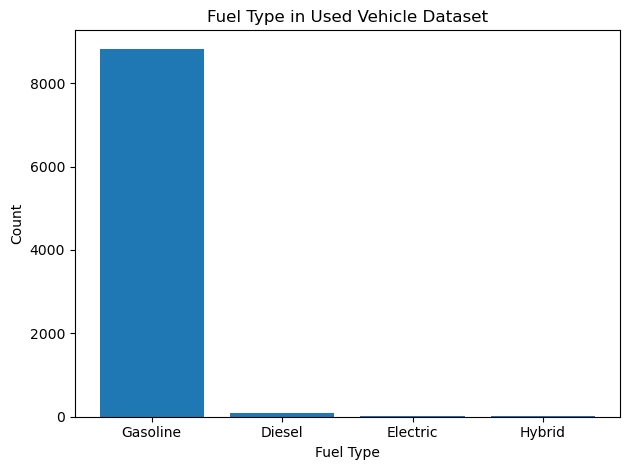

In [22]:
# Count the occurrences of each unique 'Fuel Type'
columns_counts = df['fuel_type'].value_counts()
print("Count of Fuel Type:")
print(columns_counts)

# Create a bar chart
plt.bar(columns_counts.index, columns_counts.values)
plt.xlabel("Fuel Type")
plt.ylabel("Count")
plt.title("Fuel Type in Used Vehicle Dataset")
plt.tight_layout()
plt.show()

Count of Seller Type:
Dealer                            5866
Owner                             2863
Dealership/Certified Pre-Owned     240
Name: seller_type, dtype: int64


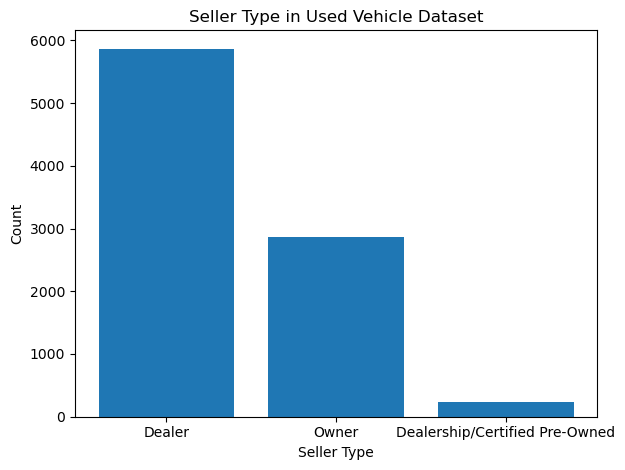

In [23]:
# Count the occurrences of each unique 'Seller Type'
columns_counts = df['seller_type'].value_counts()
print("Count of Seller Type:")
print(columns_counts)

# Create a bar chart
plt.bar(columns_counts.index, columns_counts.values)
plt.xlabel("Seller Type")
plt.ylabel("Count")
plt.title("Seller Type in Used Vehicle Dataset")
plt.tight_layout()
plt.show()

Count of Colour Car:
White          3044
Black          1800
Grey           1170
Silver          803
Blue            643
Red             572
Gold            233
Brown           225
Green           119
Orange           74
Yellow           71
Burgundy         69
Other Color      60
Beige            56
Purple           22
Tan               4
Teal              4
Name: color, dtype: int64


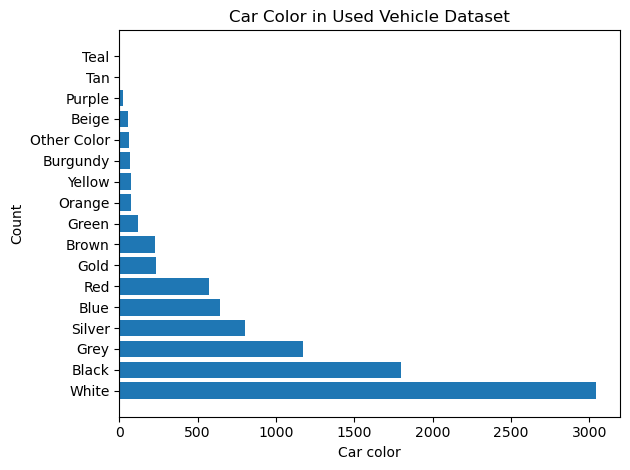

In [24]:
# Count the occurrences of each unique 'Car Color' 
columns_counts = df['color'].value_counts()
print("Count of Colour Car:")
print(columns_counts)

# Create a horizontal bar chart
plt.barh(columns_counts.index, columns_counts.values)
plt.xlabel("Car color")
plt.ylabel("Count")
plt.title("Car Color in Used Vehicle Dataset") 
plt.tight_layout()
plt.show()

Count of Company:
mercedes-benz           1295
nissan                   861
toyota                   700
bmw                      652
ford                     542
                        ... 
smart                      1
saab                       1
westfield-sportscars       1
dongfeng                   1
maxus                      1
Name: company, Length: 68, dtype: int64


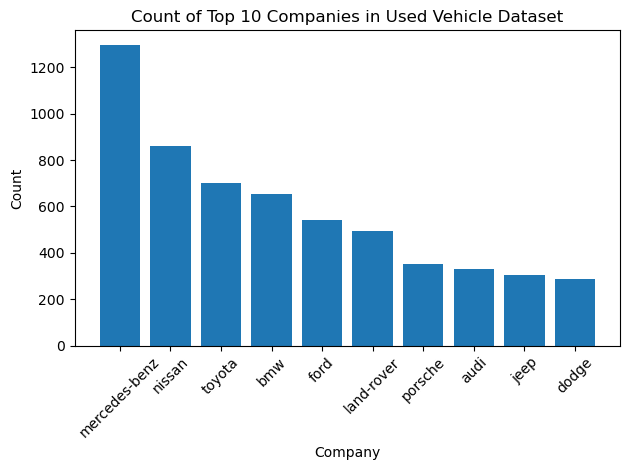

In [25]:
# Count the occurrences of each unique 'Company'
columns_counts = df['company'].value_counts()
print("Count of Company:")
print(columns_counts)

#Sort the company counts in descending order
columns_counts = columns_counts.sort_values(ascending=False)

# Get the top 10 companies
top_10_companies = columns_counts.head(10)

# Create a bar chart
plt.bar(top_10_companies.index, top_10_companies.values)
plt.xlabel("Company")
plt.ylabel("Count")
plt.title("Count of Top 10 Companies in Used Vehicle Dataset")
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()

Count of Model:
patrol               370
s-class              238
range-rover-sport    182
c-class              179
e-class              171
                    ... 
gs4                    1
renegade               1
grand-marquis          1
rx8                    1
odyssey-j              1
Name: model, Length: 530, dtype: int64


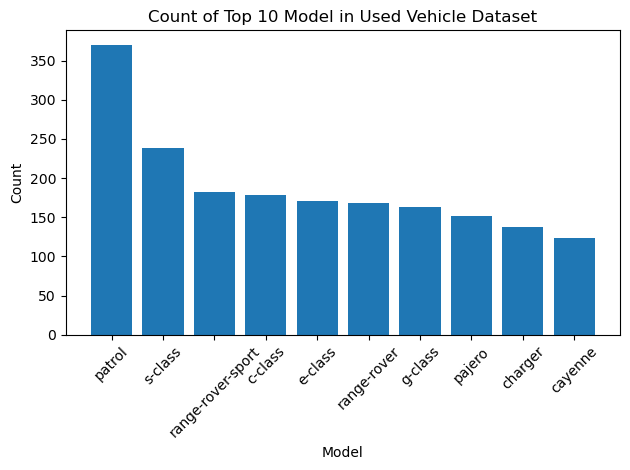

In [26]:
# Count the occurrences of each unique 'model'
columns_counts = df['model'].value_counts()
print("Count of Model:")
print(columns_counts)

#Sort the company counts in descending order
columns_counts = columns_counts.sort_values(ascending=False)

# Get the top 10 companies
top_10_companies = columns_counts.head(10)

# Create a bar chart
plt.bar(top_10_companies.index, top_10_companies.values)
plt.xlabel("Model")
plt.ylabel("Count")
plt.title("Count of Top 10 Model in Used Vehicle Dataset")
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()

# Clustering

In [27]:
# Creates a new DataFrame
clustering_df = df[['kilometers', 'price_in_aed']]

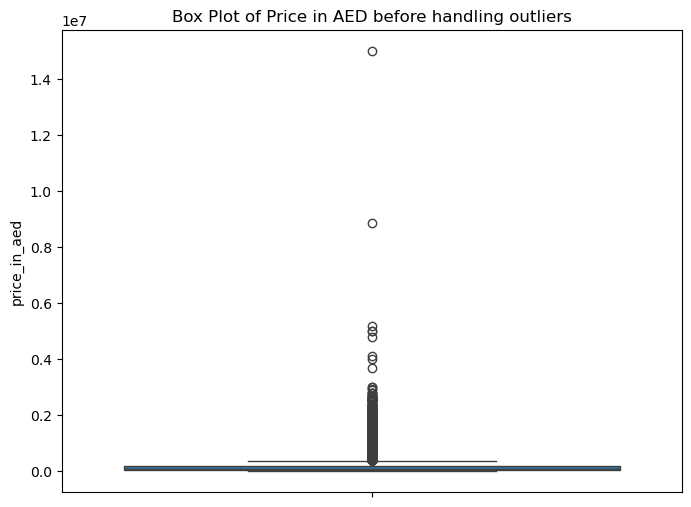

In [28]:
# Box plot for 'price_in_aed'
plt.figure(figsize=(8, 6))
sns.boxplot(data = clustering_df, y = 'price_in_aed')
plt.title('Box Plot of Price in AED before handling outliers')
plt.show()

C:\Users\afiq_\AppData\Local\Temp\ipykernel_13804\480074983.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustering_df['price_in_aed_capped'] = np.where(clustering_df['price_in_aed'] < lower_bound, lower_bound,


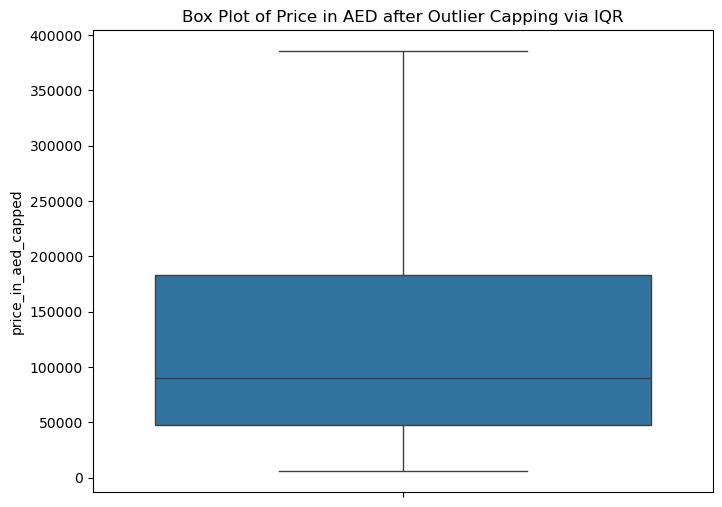

In [29]:
import numpy as np

# Calculate the IQR for the 'price_in_aed' column
Q1 = clustering_df['price_in_aed'].quantile(0.25)
Q3 = clustering_df['price_in_aed'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap the outliers using the upper and lower bounds
clustering_df['price_in_aed_capped'] = np.where(clustering_df['price_in_aed'] < lower_bound, lower_bound, 
                                        np.where(clustering_df['price_in_aed'] > upper_bound, upper_bound, clustering_df['price_in_aed']))

# Display the box plot of the capped 'price_in_aed' column
plt.figure(figsize=(8, 6))
sns.boxplot(data=clustering_df, y='price_in_aed_capped')
plt.title('Box Plot of Price in AED after Outlier Capping via IQR')
plt.show()

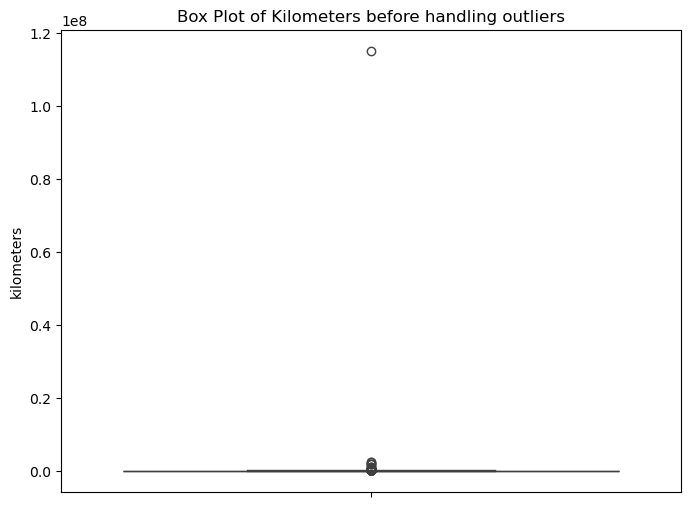

In [30]:
# Box plot for 'kilometers'
plt.figure(figsize=(8, 6))
sns.boxplot(data = clustering_df, y = 'kilometers')
plt.title('Box Plot of Kilometers before handling outliers')
plt.show()

C:\Users\afiq_\AppData\Local\Temp\ipykernel_13804\2652320189.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustering_df['kilometer_capped'] = np.where(clustering_df['kilometers'] < lower_bound, lower_bound,


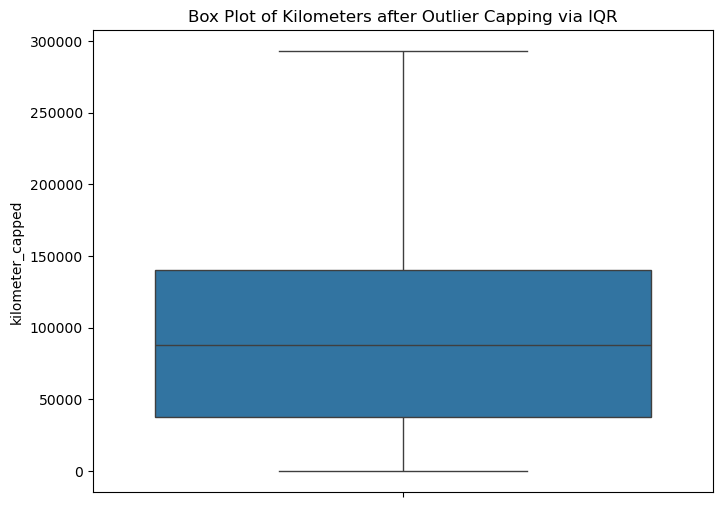

In [31]:
# Calculate the IQR for the 'kilometers' column
Q1 = clustering_df['kilometers'].quantile(0.25)
Q3 = clustering_df['kilometers'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap the outliers using the upper and lower bounds
clustering_df['kilometer_capped'] = np.where(clustering_df['kilometers'] < lower_bound, lower_bound, 
                                        np.where(clustering_df['kilometers'] > upper_bound, upper_bound, clustering_df['kilometers']))

# Display the box plot of the capped 'kilometers' column
plt.figure(figsize=(8, 6))
sns.boxplot(data=clustering_df, y='kilometer_capped')
plt.title('Box Plot of Kilometers after Outlier Capping via IQR')
plt.show()

In [32]:
clustering_df.head()

,kilometers,price_in_aed,price_in_aed_capped,kilometer_capped
0,167390,26000,26000.0,167390.0
1,39000,110000,110000.0,39000.0
2,200000,78000,78000.0,200000.0
3,27000,899000,385500.0,27000.0
4,69000,33000,33000.0,69000.0


In [33]:
from sklearn import preprocessing
from sklearn.cluster import KMeans

In [34]:
#Creates a new DataFrame X 
X = clustering_df.drop(["kilometers","price_in_aed"],axis=1)

# Normalizes the numerical features.
X_norm = preprocessing.normalize(X)

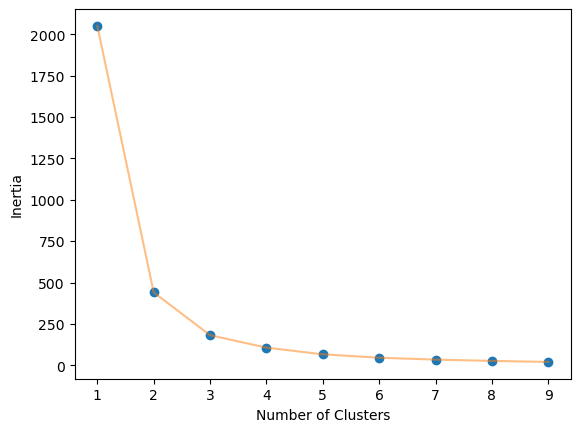

In [35]:
# Defines a function named elbow_plot that takes two parameters
# data (the dataset to be clustered) and clusters (the maximum number of clusters to consider in the elbow plot).

def elbow_plot(data,clusters): 
    inertia = [] #Initializes an empty list to store the sum of squared distances (inertia) for each number of clusters.
    for n in range(1, clusters):  # Loop for Different Cluster Numbers
        algorithm = KMeans(
            n_clusters=n,
            init="k-means++",
            random_state=125,
        )
        algorithm.fit(data)
        inertia.append(algorithm.inertia_)
    # Elbow Plot Generation
    plt.plot(np.arange(1 , clusters) , inertia , 'o')  
    plt.plot(np.arange(1 , clusters) , inertia , '-' , alpha = 0.5)
    plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
    plt.show();

elbow_plot(X_norm,10)

In [36]:
algorithm = KMeans(n_clusters=3, init="k-means++", random_state=125) # Initialization of KMeans Algorithm
algorithm.fit(X_norm) #Fitting the Algorithm to Data
labels = algorithm.labels_ # Extracting Cluster Labels

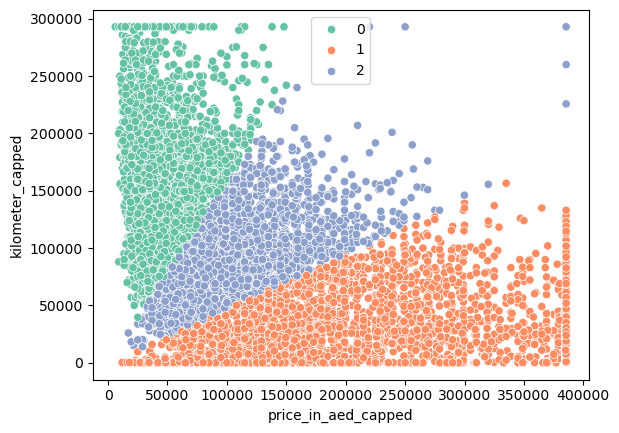

In [37]:
sns.scatterplot(data = X, x = 'price_in_aed_capped', y = 'kilometer_capped', hue = labels, palette="Set2"); #create a scatter plot based on the clustered data points

In [38]:
# Assigns cluster labels to each data point based on the learned cluster centroids.
y=algorithm.predict(X_norm) 

# Adds a new column named "label" to the DataFrame and assigns the cluster labels (y) to the corresponding rows.
clustering_df["label"]=y 

# Displays the first few rows of the DataFrame
clustering_df.head()

C:\Users\afiq_\AppData\Local\Temp\ipykernel_13804\1383117699.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustering_df["label"]=y


,kilometers,price_in_aed,price_in_aed_capped,kilometer_capped,label
0,167390,26000,26000.0,167390.0,0
1,39000,110000,110000.0,39000.0,1
2,200000,78000,78000.0,200000.0,0
3,27000,899000,385500.0,27000.0,1
4,69000,33000,33000.0,69000.0,0
